In [1]:
from sklearn.preprocessing import PowerTransformer, FunctionTransformer

In [35]:
pt = PowerTransformer(method="box-cox", standardize=False)

In [36]:
import seaborn as sns

df = sns.load_dataset("titanic")

In [37]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [38]:
from scipy.stats import probplot
import matplotlib.pyplot as plt

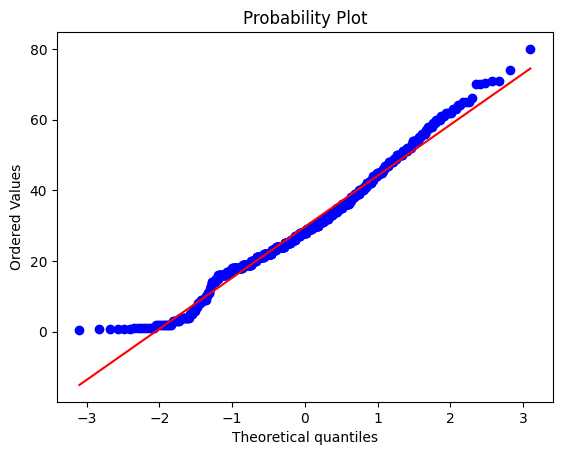

In [39]:
probplot(df["age"].dropna(), plot=plt)
plt.show()

In [40]:
df["age"].skew()

np.float64(0.38910778230082704)

In [41]:
df["age"] = pt.fit_transform(df[["age"]])

In [43]:
df["age"].skew()

np.float64(-0.049074349553788164)

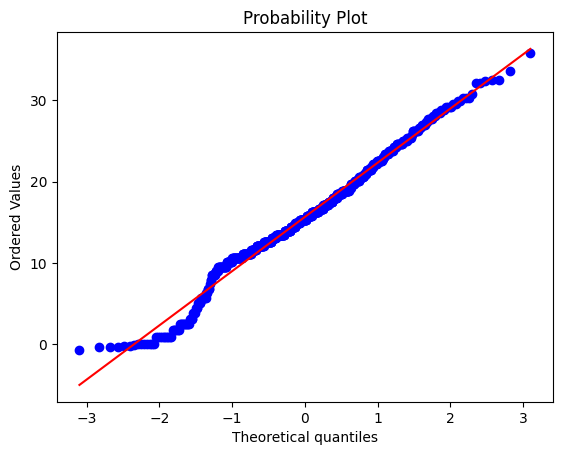

In [44]:
probplot(df["age"].dropna(), plot=plt)
plt.show()

In [22]:
import numpy as np
np.log(df["age"][0])

np.float64(3.091042453358316)

In [26]:
df["age_new"][0]

np.float64(12.543202999642622)

In [27]:
pt.lambdas_

array([0.76278905])

In [28]:
pt.feature_names_in_

array(['age'], dtype=object)

In [29]:
pt.n_features_in_

1

In [30]:
pt.get_feature_names_out()

array(['age'], dtype=object)

In [31]:
pt._parameter_constraints

{'method': [<sklearn.utils._param_validation.StrOptions at 0x7b013cbab340>],
 'standardize': ['boolean'],
 'copy': ['boolean']}

In [ ]:
import numpy as np

invrs_orignal = pt.inverse_transform((df[["age"]])).reshape(-1, 1)

In [73]:
np.concat((invrs_orignal, df2["age"].values.reshape(-1, 1)), axis=1)

array([[22., 22.],
       [38., 38.],
       [26., 26.],
       ...,
       [nan, nan],
       [26., 26.],
       [32., 32.]])

In [ ]:
# Find the name of all the columns in the dataset where values are negative
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,12.543203,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,19.709238,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,14.426014,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,18.431140,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,18.431140,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [92]:
(df2.select_dtypes(include=[np.number]) < 0).any()

survived    False
pclass      False
age         False
sibsp       False
parch       False
fare        False
dtype: bool

In [ ]:
# 0.46676086
pt2 = PowerTransformer(standardize=True )

In [110]:
import pandas as pd

new_arr = pt2.fit_transform(df[["age"]].dropna())

In [114]:
abs((new_arr[0] - np.mean(new_arr)) / np.std(new_arr))

array([0.46676086])

In [120]:
pt2.standardize

False

In [132]:
ft = FunctionTransformer(func=np.sin)
ft2 = FunctionTransformer(func=np.cos)

In [134]:
ft.fit_transform(df["fare"]) ** 2 + ft2.fit_transform(df["fare"]) ** 2

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
886    1.0
887    1.0
888    1.0
889    1.0
890    1.0
Name: fare, Length: 891, dtype: float64

In [138]:
df["fare"].skew()

np.float64(4.787316519674893)

In [139]:
# Highly Right Skewed Data -> Log Transformation

In [140]:
ft = FunctionTransformer(func=np.log1p)

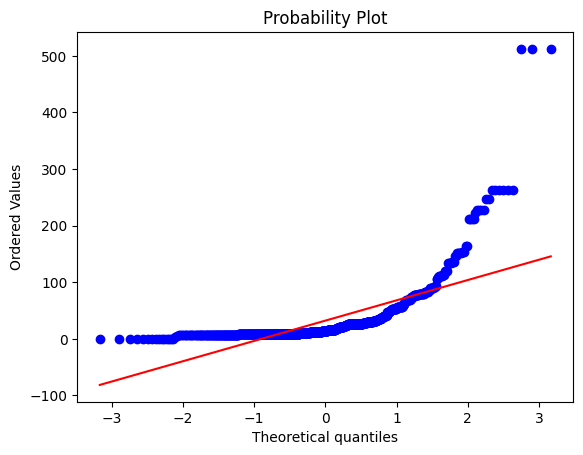

In [141]:
probplot(df["fare"].dropna(), plot=plt)
plt.show()

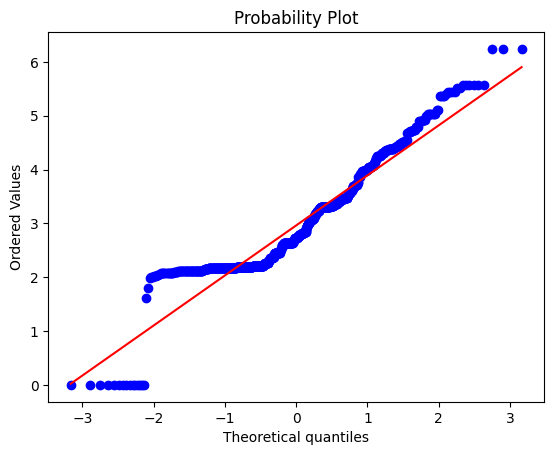

In [150]:
probplot(ft.fit_transform(df["fare"].dropna()), plot=plt)
plt.show()

In [156]:
df["new_fare"] = pt2.fit_transform(df[["fare"]].dropna())

In [159]:
df["new_fare"].skew()

np.float64(-0.04032918275876297)

In [161]:
ft.fit_transform(df["fare"].dropna()).skew()

np.float64(0.3949280095189306)

In [162]:
# Moderate Right Skewed Data -> Square Root Transformation

In [ ]:
# Everything else
# Yeo-Johnson Transformation

In [ ]:
# The End